In [87]:
import numpy as np                               #Importing numpy library
import pandas as pd                              #Importing pandas library
import os                                        #Importing os library
import seaborn as sns                            #Importing seaborn library
import matplotlib.pyplot as plt                  #Importing Matplotlib library
from sklearn.cross_validation import train_test_split #For test-train split
from sklearn.tree import DecisionTreeClassifier   #For fitting classification tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score  

In [88]:
os.chdir(os.getcwd())                           #Setting current working directory
pd.set_option('display.max_columns',100)        #Set Dataframe to display max columns of 100        

In [89]:
df = pd.read_excel('Attrition.xlsx')            #Reading Attrition excel using Pandas

## Exploratory Data Analysis

In [90]:
df.head()                                       #Displaying first 5 rows.

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [91]:
df.shape         #Displaying shape of dataframe

(1470, 35)

In [92]:
df.dtypes        #Fetching columns datatypes of dataframe. 

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [93]:
df.describe() #Describing 5 - point summary of Dataframe.

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [94]:
df.isnull().sum()    #It doesnot contain any null value.

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

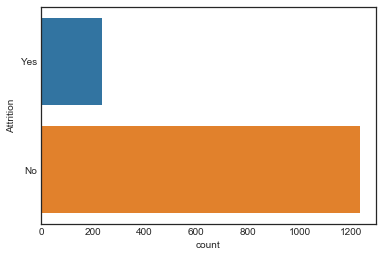

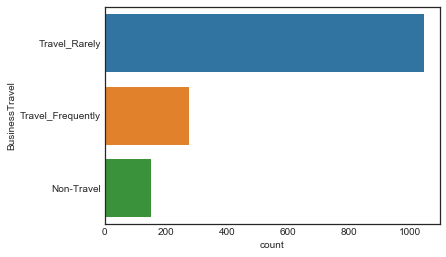

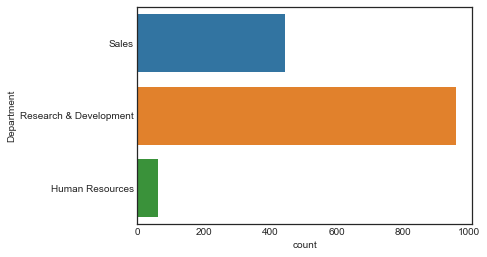

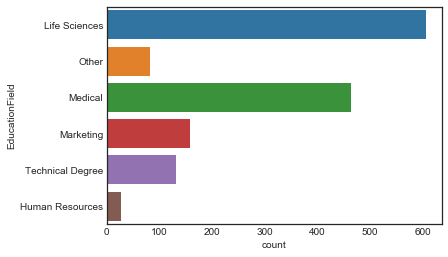

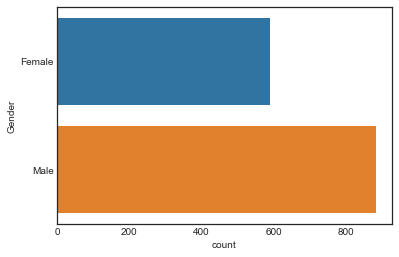

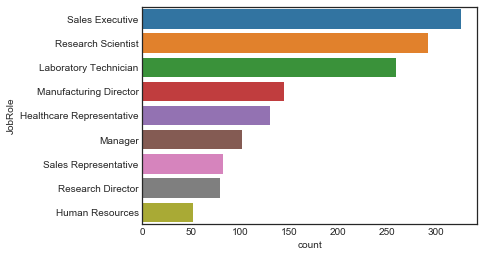

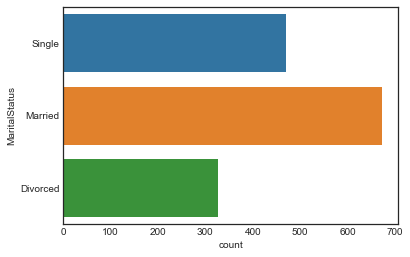

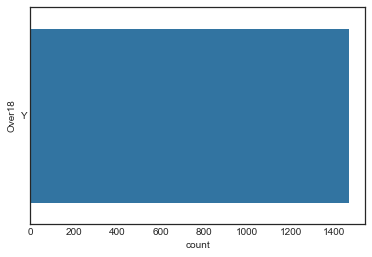

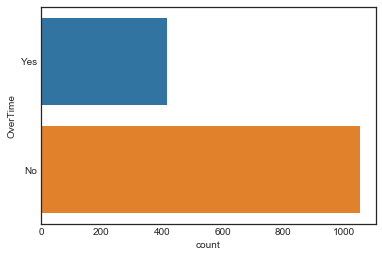

In [95]:
for feature in df.dtypes[df.dtypes == 'object'].index: #Iterating over the feature having datatype as 'Object'
    sns.countplot(y=feature,data=df)                   #count of values of different subcategorial values of columns.
    plt.show()                                         #showing the plot.   

In [96]:
tab = pd.crosstab(df.Attrition,columns=df.Department) #cross-tab between Attrition Vs Department
coltotal = tab.sum(axis=0)                            #coltotal sum
round(tab/coltotal,2)                                 #rounding ratio of tab with columntotal  

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,0.81,0.86,0.79
Yes,0.19,0.14,0.21


In [97]:
tab = pd.crosstab(df.Attrition,columns=df.BusinessTravel) #cross-tab between Attrition Vs BusinessTravel
coltotal = tab.sum(axis=0)                                #coltotal sum 
round(tab/coltotal,2)                                     #rounding ratio of tab with columntotal 

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,0.92,0.75,0.85
Yes,0.08,0.25,0.15


In [98]:
tab = pd.crosstab(df.Attrition,columns=df.EducationField) #cross-tab between Attrition Vs EducationalField
coltotal = tab.sum(axis=0)                                #coltotal sum
round(tab/coltotal,2)                                 #rounding ratio of tab with columntotal 

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,0.74,0.85,0.78,0.86,0.87,0.76
Yes,0.26,0.15,0.22,0.14,0.13,0.24


In [99]:
tab = pd.crosstab(df.Attrition,columns=df.Gender) #cross-tab between Attrition Vs Gender
coltotal = tab.sum(axis=0)                                #coltotal sum
round(tab/coltotal,2)                                 #rounding ratio of tab with columntotal 

Gender,Female,Male
Attrition,,
No,0.85,0.83
Yes,0.15,0.17


In [100]:
tab = pd.crosstab(df.Attrition,columns=df.JobRole) #cross-tab between Attrition Vs JobRole
coltotal = tab.sum(axis=0)                                #coltotal sum
round(tab/coltotal,2)                                 #rounding ratio of tab with columntotal 

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,0.93,0.77,0.76,0.95,0.93,0.98,0.84,0.83,0.6
Yes,0.07,0.23,0.24,0.05,0.07,0.02,0.16,0.17,0.4


In [101]:
tab = pd.crosstab(df.Attrition,columns=df.MaritalStatus) #cross-tab between Attrition Vs MaritalStatus
coltotal = tab.sum(axis=0)                                #coltotal sum
round(tab/coltotal,2)                                 #rounding ratio of tab with columntotal 

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,0.9,0.88,0.74
Yes,0.1,0.12,0.26


In [102]:
tab = pd.crosstab(df.Attrition,columns=df.OverTime) #cross-tab between Attrition Vs OverTime
coltotal = tab.sum(axis=0)                                #coltotal sum
round(tab/coltotal,2)                                 #rounding ratio of tab with columntotal 

OverTime,No,Yes
Attrition,,
No,0.9,0.69
Yes,0.1,0.31


Text(0.5,1,'Years In Current Role')

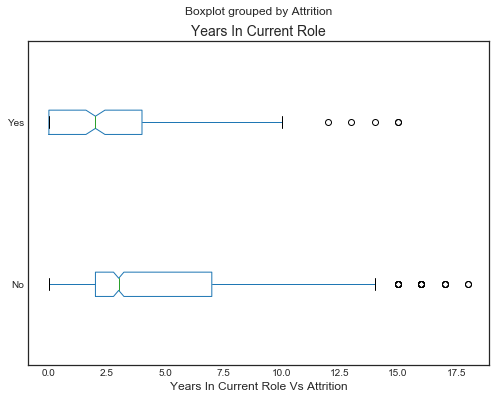

In [103]:
df.boxplot(column='YearsInCurrentRole',notch=True,
            grid=False,
            by = 'Attrition',
            figsize=(8,6),
            vert= False)                               #Boxplot for Attrition Vs YearsInCurrentRole
plt.xlabel('Years In Current Role Vs Attrition',fontsize=12) #plot value xlabel 
plt.title('Years In Current Role',fontsize=14)               #plot title

In [104]:
correlation = df.corr()               #finding correlation value.

In [105]:
correlation = correlation * 100       #Scaling correlation value to measure value in 0 to 100 scale

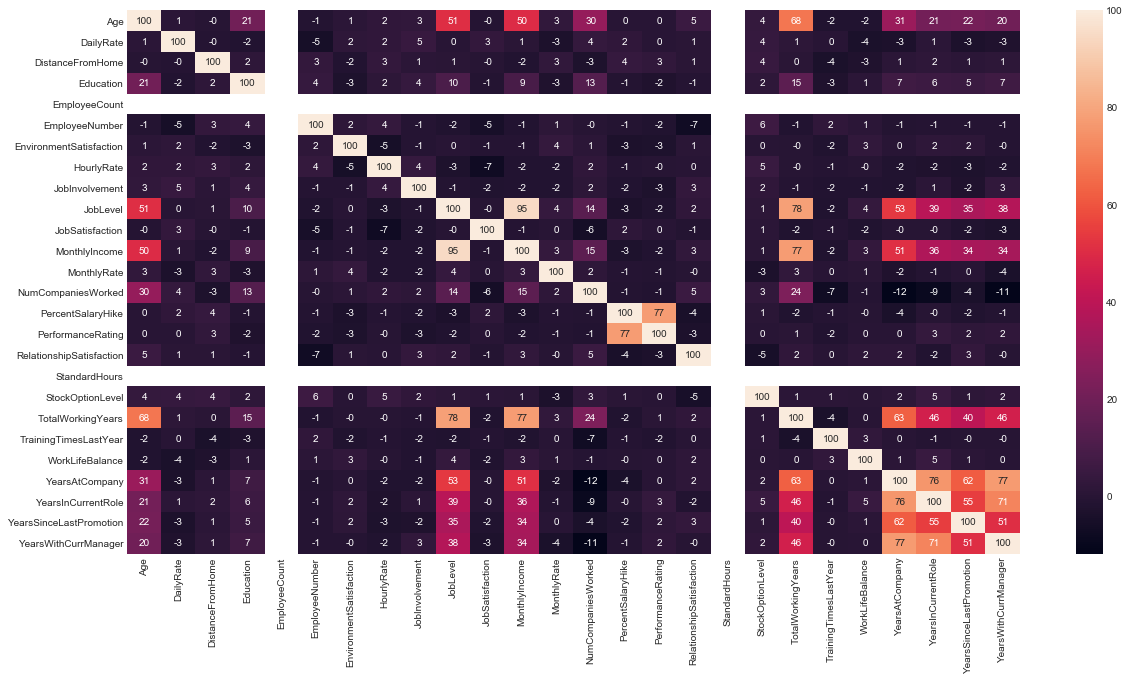

In [106]:
plt.figure(figsize=(20,10))           #specifying size of plot.
sns.set_style(style = 'white')        #setting rows and columns as 'white' whose value doesnot have zero Std Dev. 
 
sns.heatmap(correlation,annot=True,fmt='.0f') #Plotting heatmap with value to display correlated variable.
plt.show()                                    #show plotted graph.

In [107]:
#Finding based on above heatmap plot ('-->'  represents correlated) In Case of Numerical variable
# Age  -- > TotalWorkingYears

# MonthlyIncome --> JobLevel
# TotalWorkingYears -- > JobLevel 
# TotalWorkingYears -- > MonthlyIncome

# PerformanceRating -- > PercentSalaryHike

# YearsInCurrentRole -- > YearAtCompany
# YearAtCompany -- > YearsWithCurrManager
# YearAtCompany -- > YearsInCurrentRole

#Reducing features giving same pattern:


# TotalWorkingYears
# YearAtCompany
# PercentSalaryHike

## Model Building

In [108]:
x = df[['BusinessTravel','Department','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','MaritalStatus',
        'OverTime','TotalWorkingYears','YearsAtCompany']] #x-value for the dataset.
y = df[['Attrition']]                                     #y-value for the dataset.

In [109]:
x = pd.get_dummies(x,columns=['BusinessTravel','Department','EducationField','Gender','MaritalStatus']) #converting categorical variable to numerical veriable using dummy variable.

In [110]:
l1  = np.array(df.OverTime)    #Converting a OverTime Series with numpy array.
l2 = []                        #creating a dummy list to store 'Yes' - 1 and 'No' - 0 

for i in l1 :                  #Iterating for loop in list1
    if 'Yes' in i:             #If it is yes 
        l2.append(1)           #append list2 with 1 
    else:
        l2.append(0)           #else append list2 with 0
x.OverTime = l2                #overwrite OverTime Series with l2 list.

In [111]:
x

,EnvironmentSatisfaction,JobInvolvement,OverTime,TotalWorkingYears,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,2,3,1,8,6,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1
1,3,2,0,10,10,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0
2,4,2,1,7,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1
3,4,3,1,8,8,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,1,3,0,6,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0
5,4,3,0,8,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
6,3,4,1,12,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
7,4,3,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0
8,4,2,0,10,9,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
9,3,3,0,17,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0


In [112]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify=y, random_state = 100) #split train and test set using sklearn lib

In [113]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5) #Using gini_index criterion create a DecisionTreeClassifier.
 
clf_gini.fit(X_train, y_train)                                  #fit and train Decision Tree with x_train and y_train value.  

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [114]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best') #Providing varies attribute of DecisionTreeClassifier.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [115]:
#Making Prediction
y_pred = clf_gini.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No',

### Confusion Matrix

In [116]:
c = confusion_matrix(y_test, y_pred) #Draw a confusion Matrix to give deviation between y_test and y_pred
c

array([[361,   9],
       [ 56,  15]], dtype=int64)